# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'f9c7a1526046e9578b98a37ca5cafcd6'

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | aitape
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | malaya vishera
Processing Record 9 of Set 1 | new plymouth
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | copainala
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | nyurba
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | ixtapa
Processing Record 19 of Set 1 | carauari
Processing Record 20 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 21 of Set 1 | ceeldheer
Processing Record 22 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,2.01,84,100,3.09,GB,1709010487
1,port-aux-francais,-49.3500,70.2167,6.07,69,4,5.32,TF,1709010488
2,college,64.8569,-147.8028,-13.82,54,75,2.06,US,1709010488
3,grytviken,-54.2811,-36.5092,-0.06,83,48,3.87,GS,1709010489
4,bethel,41.3712,-73.4140,5.18,84,0,1.54,US,1709010489


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,2.01,84,100,3.09,GB,1709010487
1,port-aux-francais,-49.3500,70.2167,6.07,69,4,5.32,TF,1709010488
2,college,64.8569,-147.8028,-13.82,54,75,2.06,US,1709010488
3,grytviken,-54.2811,-36.5092,-0.06,83,48,3.87,GS,1709010489
4,bethel,41.3712,-73.4140,5.18,84,0,1.54,US,1709010489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

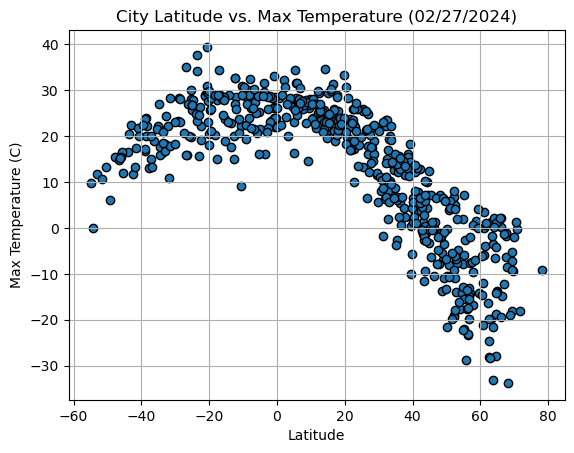

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

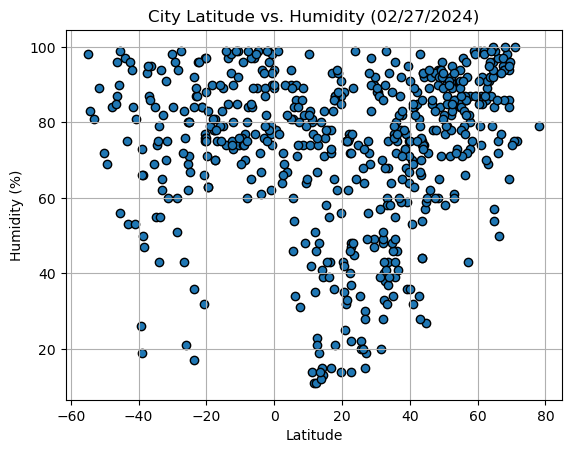

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

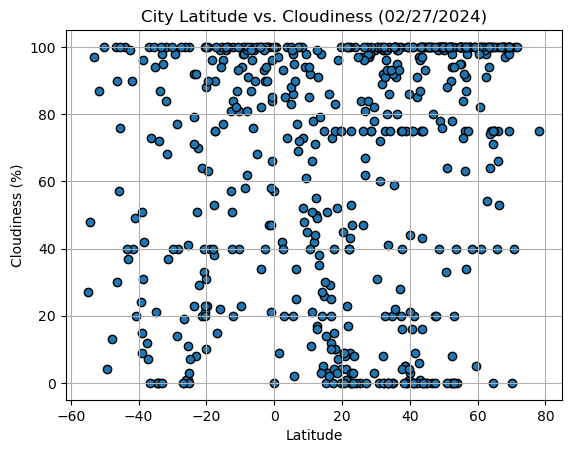

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

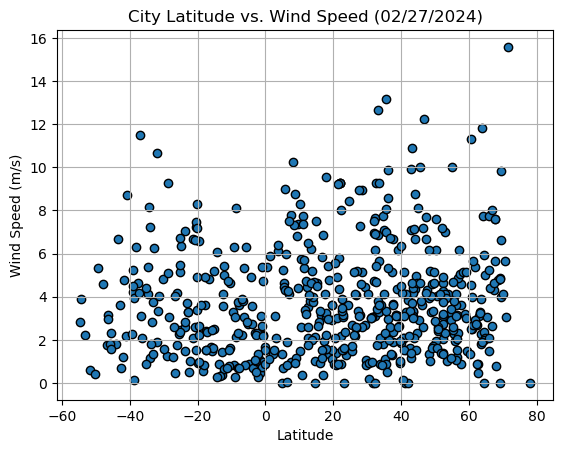

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (02/27/2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, slope*x_values + intercept, "r", alpha=0.75)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-squared is: {r_value**2:.2f}")
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,2.01,84,100,3.09,GB,1709010487
2,college,64.8569,-147.8028,-13.82,54,75,2.06,US,1709010488
4,bethel,41.3712,-73.4140,5.18,84,0,1.54,US,1709010489
7,malaya vishera,58.8454,32.2222,1.41,99,100,3.20,RU,1709010492
10,copainala,17.0833,-93.2000,18.99,93,73,0.35,MX,1709010493


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,6.07,69,4,5.32,TF,1709010488
3,grytviken,-54.2811,-36.5092,-0.06,83,48,3.87,GS,1709010489
5,aitape,-3.1374,142.3475,28.80,76,93,2.32,PG,1709010491
6,edinburgh of the seven seas,-37.0676,-12.3116,15.04,87,100,11.51,SH,1709010491
8,new plymouth,-39.0667,174.0833,16.84,73,51,4.22,NZ,1709010492


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.77


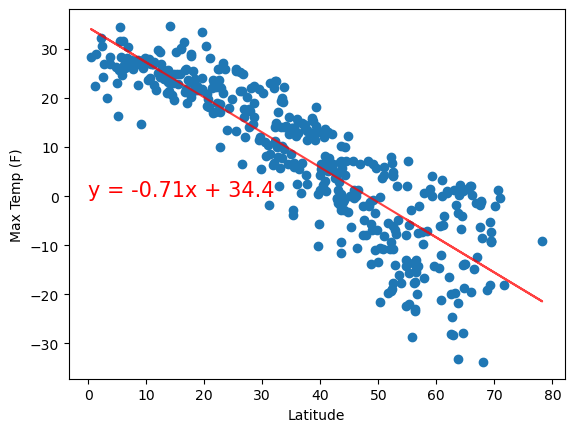

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", (0,0))

The r-squared is: 0.31


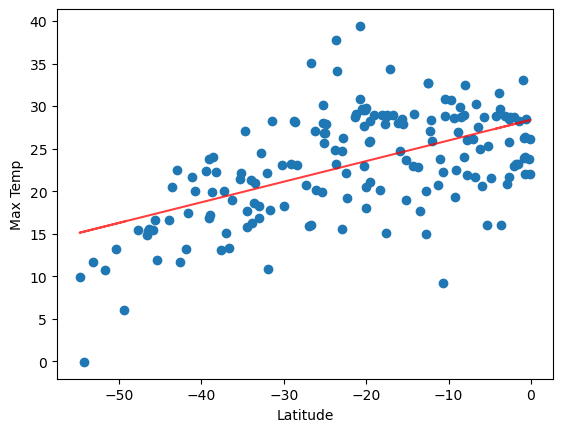

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", (-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16


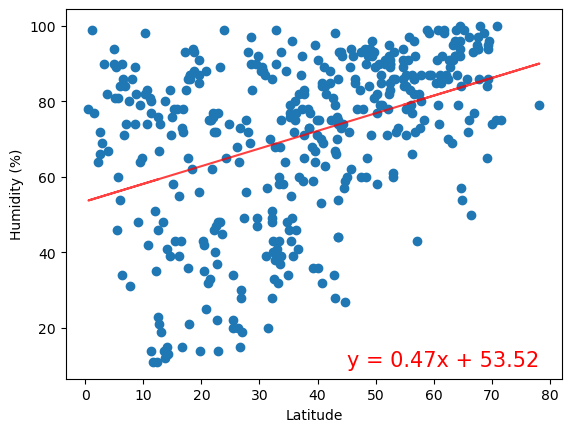

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", (45,10))

The r-squared is: 0.04


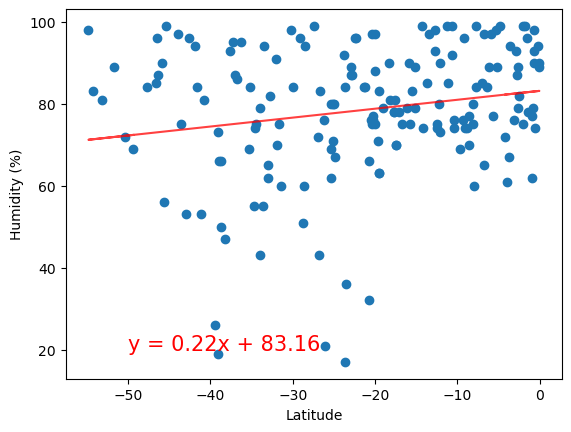

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08


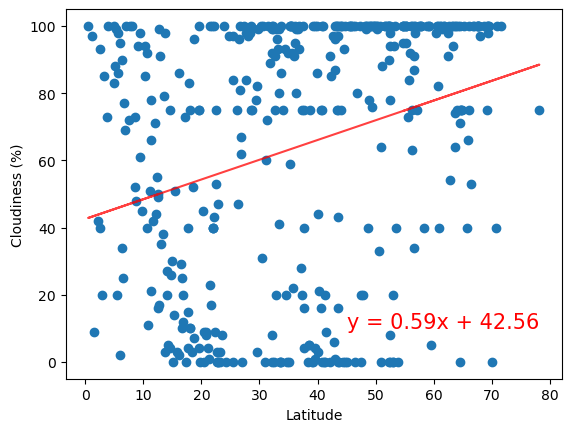

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", (45,10))

The r-squared is: 0.08


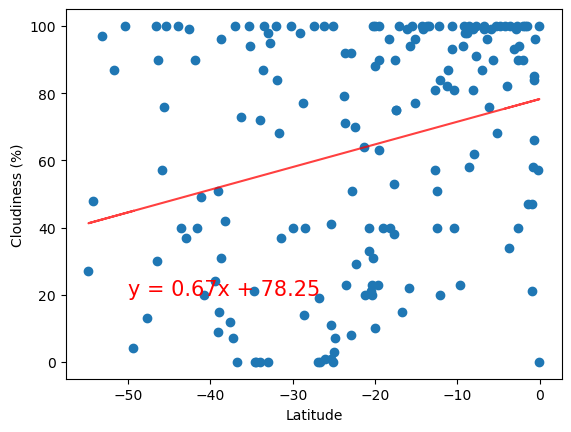

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00


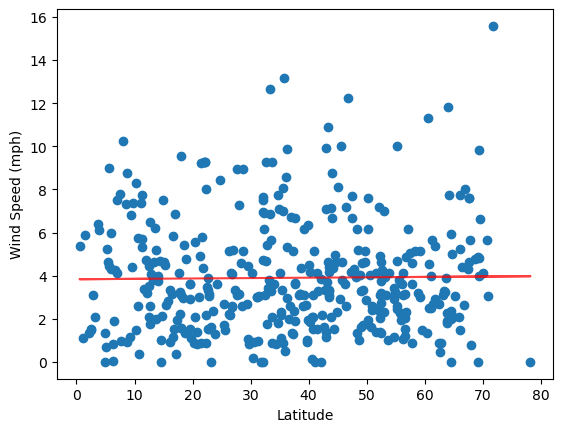

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", (0,40))

The r-squared is: 0.04


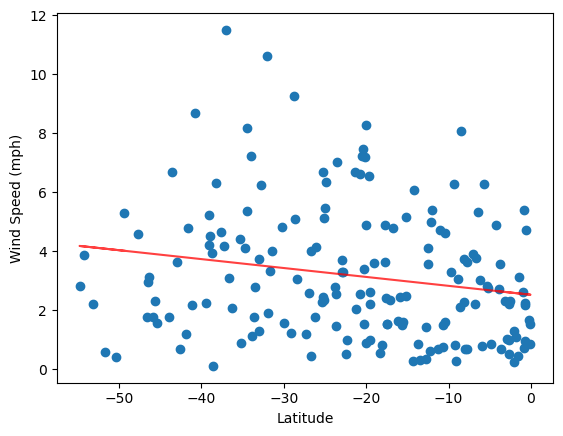

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE